<a href="https://colab.research.google.com/github/siham-89/dd/blob/master/Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Introduction I** 

 TensorFlow utilise un graph statique ainsi que des bibliothèques d’abstractions, telles que l’API de réseaux de neurones Keras, Sonnet ou encore TFLearn. Le principal langage de programmation de TensorFlow est Python, mais les langages C++, Java et Go sont également pris en charge. Une API basée sur C est aussi disponible pour permettre la prise en charge d’autres langages.

L’un des principaux avantages de TensorFlow est sa grande communauté, proposant des didacticiels, des documents et des projets. 
L’un des principaux avantages de TensorFlow est sa gran

Ce projet a pour but de classer des images de vêtements, comme des baskets et des chemises. Il s'agit d'un aperçu rapide d'un programme complet TensorFlow avec les détails expliqués au fur et à mesure.
Nous avons utilisé tf.keras, une API de haut niveau pour créer et former des modèles dans TensorFlow.

# On commence par le code ci-joint pour importer TensorFlow, tf.keras, et les bibliothèques dont nous avons besoin.


In [1]:
# Importing Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Other Dependancies
import numpy as np
import matplotlib.pyplot as plt

# Puis importer les données en utilisant Fashion MNIST.

In [2]:
# Our Dataset - Fashion MNIST (https://github.com/zalandoresearch/fashion-mnist)
fashion_mnist = keras.datasets.fashion_mnist

Fashion MNIST est conçu pour remplacer de manière ininterrompue le jeu de données MNIST classique, souvent utilisé comme "Hello, World" des programmes d'apprentissage automatique pour la vision par ordinateur. 

Le jeu de données MNIST contient des images de chiffres manuscrits (0, 1, 2, etc.) dans un format identique à celui des vêtements que nous allons utiliser.

Nous avons utilisé Fashion MNIST pour la variété et parce qu’il s’agit d’un problème un peu plus complexe que le standard MNIST. Les deux jeux de données sont relativement petits et permettent de vérifier qu'un algorithme fonctionne comme prévu. Ce sont de bons points de départ pour tester et déboguer le code.


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Le chargement du jeu de données renvoie quatre tableaux NumPy.


*   Les tableaux train_images et train_labels constituent l'ensemble d'apprentissage: les données que le modèle utilise pour apprendre.
*   Le modèle est testé par rapport aux ensembles de tests, aux tableaux test_images et test_labels.


Les images sont des tableaux NumPy 28x28, avec des valeurs de pixels allant de 0 à 255. 

Les étiquettes sont un tableau d’entiers allant de 0 à 9. Celles-ci correspondent à la classe de vêtement représentée par l’image suivante :


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


Chaque image est mappée sur une seule étiquette. Étant donné que les noms de classe ne sont pas inclus dans le jeu de données, nous les avons stocké ici pour les utiliser ultérieurement lors du traçage des images

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
Explorons le format de l'ensemble de données avant de former le modèle. 
L’appel d’entraînement contient 60 000 images, chaque image représentant 28 x 28 pixels:

In [5]:
# Shapes of the Training Set
print("Training set (images) shape: {shape}".format(shape=train_images.shape))
print("Training set (labels) shape: {shape}".format(shape=train_labels.shape))

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)


# Pré-traitement les données
Les données doivent être prétraitées avant de former le réseau. Si vous inspectez la première image du jeu d'apprentissage, vous verrez que les valeurs en pixels sont comprises entre 0 et 255:

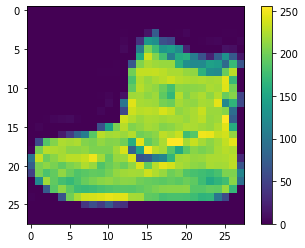

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Nous avons mis ces valeurs à l'échelle de 0 à 1 avant de les transmettre au modèle de réseau neuronal. Pour ce faire, nous avons divisé les valeurs par 255. Il est important que le jeu d'apprentissage et le jeu de tests soient prétraités de la même manière:

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Pour vérifier que le format des données est correct et que nous sommes prêt à créer et à former le réseau, affichons les 25 premières images du jeu d'apprentissage et affichons le nom de la classe sous chaque image :


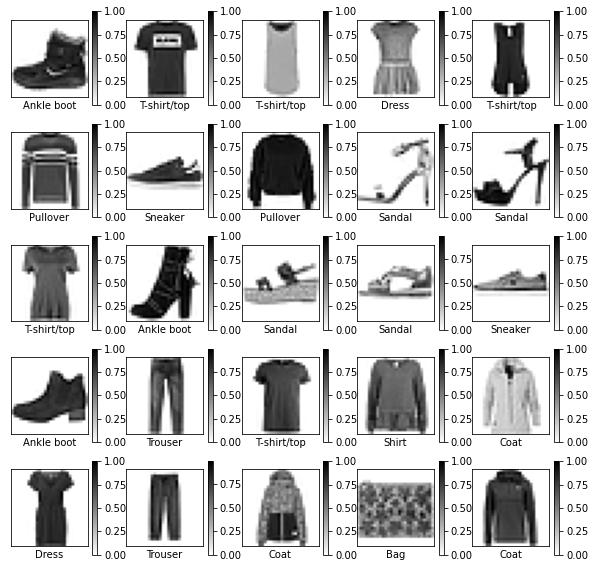

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])

Maintenant, nous allons construire le modèle et mettre en place les couches du réseau neuronal.


* La 1ère couche: tf.keras.layers.Flatten
: transforme le format des images d'un 2d-array (de 28 par 28 pixels), en un 1d-array de 28 * 28 = 784 pixels
* Les 2ème et 3ème couches: tf.keras.layers.Dense
Ce sont des couches neuronales densément connectées ou entièrement connectées.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compilation


* Loss function : Cela mesure la précision du modèle pendant l'entraînement. Vous 
souhaitez minimiser cette fonction pour "orienter" le modèle dans la bonne direction.
* Optimizer : voici comment le modèle est mis à jour en fonction des données qu'il voit et de sa fonction de perte.
* Metrics : Utilisé pour surveiller les étapes de formation et de test. L'exemple suivant utilise la précision, la fraction des images correctement classées.
   

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Former le modèle

La formation du modèle de réseau neuronal nécessite les étapes suivantes:

1. Envoyez les données d'entraînement au modèle. Dans cet exemple, les données d'apprentissage se trouvent dans les tableaux train_images et train_labels.
2. Le modèle apprend à associer des images et des étiquettes.
3. Vous demandez au modèle de faire des prédictions sur un jeu de test - dans cet exemple, le tableau test_images.
4. Vérifiez que les prédictions correspondent aux étiquettes du tableau test_labels.


Pour commencer l'entraînement, appelez la méthode model.fit, ainsi appelée parce qu'elle «adapte» le modèle aux données d'entraînement:

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5018 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2548 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

# Faire des prédictions

Le but c’est d’utiliser ce model pour faire des prédictions sur certaines images.

Une prédiction est un tableau de 10 nombres. Ils représentent la "confiance" du modèle que l'image correspond à chacun des 10 vêtements différents




In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Vérifier les prédictions

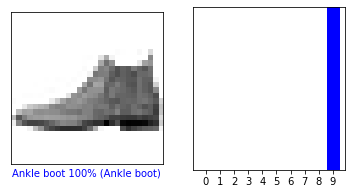

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Regardons la 0ème image, les prédictions et le tableau de prédiction. Les étiquettes de prédiction correctes sont en bleu et les étiquettes de prédiction incorrectes sont en rouge. Le nombre indique le pourcentage (sur 100) de l'étiquette prévue.


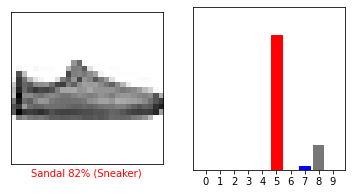

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

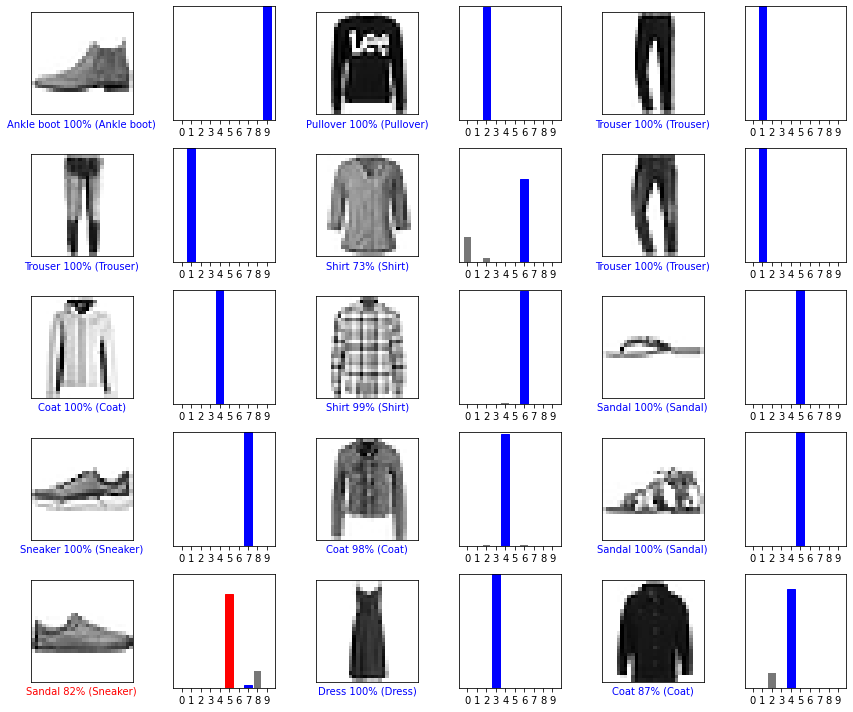

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Utilisez le modèle entraîné
Enfin, utilisez le modèle entraîné pour faire une prédiction sur une seule image.

(28, 28)
(1, 28, 28)
[[2.2650787e-04 8.2222623e-12 9.9560922e-01 1.8677881e-09 2.4425166e-03
  1.1134888e-11 1.7217248e-03 2.2533079e-14 3.4831887e-10 6.5009636e-14]]


2

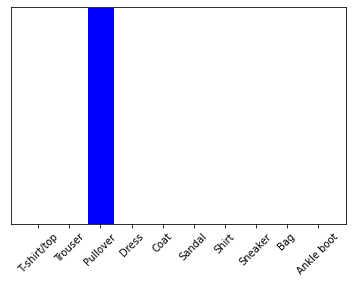

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])